In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
import networkx as nx
import tqdm
from util import plotter

In [74]:
disc = "PM"
authors_valid  = pd.read_pickle(f"./result/authors_valid_{disc}.pickle")

THRESHOLD_WORKS = 300

work_size = authors_valid.groupby("authid")["eid"].count()
target = authors_valid[authors_valid["authid"].isin(work_size[work_size>THRESHOLD_WORKS].index)]
target

,eid,authid,authseq,indexname,surname,givenname,doctype,partition
424,85015254729,6603874026,8,Kurmaev E.Z.,Kurmaev,Ernst Z.,ar,3.0
731,85015254964,26643620400,7,Liu S.,Liu,Sheng,ar,3.0
985,85015255132,7202220568,7,Gu S.,Gu,Shulin,ar,3.0
1027,85015330172,7102090179,7,Makino A.,Makino,NO GIVENNAME,ar,3.0
1542,85015330528,7007135183,1,Straumal B.B.,Straumal,Boris B.,re,3.0
...,...,...,...,...,...,...,...,...
289837081,84927731004,55551960800,8,Sun Y.-K.,Sun,Yang-Kook,ar,3.0
289837181,84927666163,13005355500,6,Raabe D.,Raabe,NO GIVENNAME,ar,3.0
289837334,84927731080,7201440214,11,Zou Z.,Zou,Zhigang,ar,3.0
289837414,84927666327,56153245600,6,Liu J.-M.,Liu,NO GIVENNAME,ar,3.0


In [82]:
target["authid"].nunique()

2824

In [76]:
res = pd.DataFrame()
for author in tqdm.tqdm(target["authid"].unique()):
    works = target[target["authid"] == author]["eid"].unique()
    coauth_history = authors_valid[authors_valid["eid"].isin(works)]
    coauth_history = coauth_history.assign(source_authid = author)
    res = pd.concat([res,coauth_history],axis="index")
res

100%|███████████████████████████████████████| 2824/2824 [33:43<00:00,  1.40it/s]


,eid,authid,authseq,indexname,surname,givenname,doctype,partition,source_authid
415,85015254729,56429735400,1,Akbulatov A.F.,Akbulatov,Azat F.,ar,3.0,6603874026
416,85015254729,54922214100,3,Frolova L.A.,Frolova,Lyubov A.,ar,3.0,6603874026
417,85015254729,55659427400,4,Dremova N.N.,Dremova,Nadezhda N.,ar,3.0,6603874026
418,85015254729,12242890200,7,Anokhin D.V.,Anokhin,Denis V.,ar,3.0,6603874026
419,85015254729,6602075364,10,Troshin P.A.,Troshin,Pavel A.,ar,3.0,6603874026
...,...,...,...,...,...,...,...,...,...
287012555,84937908964,56735676100,2,Miao W.,Miao,Wang,ar,3.0,57207993094
287012556,84937908964,55787450700,3,Li C.,Li,Chen,ar,3.0,57207993094
287012557,84937908964,57210330413,4,Sun X.,Sun,Xianzhong,ar,3.0,57207993094
287012558,84937908964,57204561102,5,Wang K.,Wang,Kai,ar,3.0,57207993094


In [81]:
res

,eid,authid,authseq,indexname,surname,givenname,doctype,partition,source_authid
8961,85015260131,57193630994,1,Wang S.-L.,Wang,Shi-Liang,ar,3.0,16402719100
8962,85015260131,8697028700,2,Yang C.-L.,Yang,Chuan-Lu,ar,3.0,16402719100
8963,85015260131,15133319400,3,Wang M.-S.,Wang,Mei-Shan,ar,3.0,16402719100
8964,85015260131,16402719100,4,Ma X.-G.,Ma,Xiao-Guang,ar,3.0,16402719100
8965,85015260131,57189231070,5,Xin J.-G.,Xin,Jian-Guo,ar,3.0,16402719100
...,...,...,...,...,...,...,...,...,...
289079274,66749113439,35616499500,6,Jerabek V.,Jerábek,Vitezslav,cp,3.0,7004807082
289079275,66749113439,6602741694,2,Huttel I.,Huttel,Ivan,cp,3.0,7004807082
289079276,66749113439,6701482255,3,Spirkova J.,Špirková,Jarmila,cp,3.0,7004807082
289079277,66749113439,35591661800,4,Oswald J.,Oswald,Jiri,cp,3.0,7004807082


In [80]:
res["source_authid"].nunique()

474

In [78]:
res.to_pickle(f"./result/coauth_history_{disc}_{THRESHOLD_WORKS}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


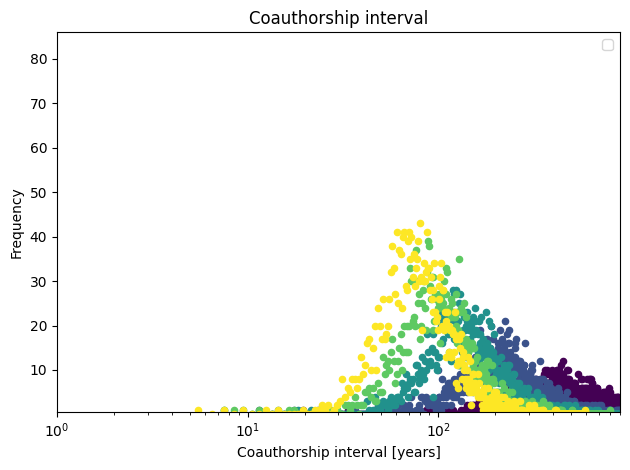

In [5]:
disc = "PM"
THRESHOLD_COAUTH = 0 #1回以上共著した人をカウント
THRESHOLD_WORKS = 300
res = pd.read_pickle(f"./result/coauth_history_{disc}_{THRESHOLD_WORKS}")
def persistent_coauthorship(group):
    c = group["authid"].value_counts()
    return c[c>THRESHOLD_COAUTH].count()

threshold_max = 5
for i in range(threshold_max):
    THRESHOLD_COAUTH = i
    n_coauth = res.groupby("source_authid").apply(persistent_coauthorship)
    color = plt.cm.viridis(i / (threshold_max - 1))
    plotter(n_coauth,c=color, count= "number",label=i, plot='log')
plt.legend()